In [1]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import sys
import csv
csv.field_size_limit(sys.maxsize)

with open('data1997.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
print(len(your_list))
tagged_data = [TaggedDocument(words=word_tokenize(str(d)), tags=[str(i)]) for i, d in enumerate(your_list)]
max_epochs = 100
vec_size = 128
alpha = 0.025

5199


In [2]:
import gensim.models as g
model="d2v(2).model"
m = g.Doc2Vec.load(model)

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
scaler = MinMaxScaler()
X = []
for i in range(5199):
    X.append(m.docvecs[i])
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled_new = []
for i in range(len(m.docvecs)):
    X_scaled_new.append(m.docvecs[i])

In [23]:
import numpy as np
X_scaled_new = np.array(X_scaled)
X_scaled_new

array([[0.47674853, 0.60688186, 0.40990547, ..., 0.54227808, 0.49937919,
        0.46660554],
       [0.39774019, 0.4387004 , 0.41826315, ..., 0.43564443, 0.62825772,
        0.66161119],
       [0.47394318, 0.71562512, 0.26750963, ..., 0.63407328, 0.49502915,
        0.29150408],
       ...,
       [0.48259515, 0.5971745 , 0.4513367 , ..., 0.56816369, 0.4749653 ,
        0.48683944],
       [0.30145239, 0.45326546, 0.27427569, ..., 0.40066833, 0.36521252,
        0.40669815],
       [0.29922484, 0.31787322, 0.59921463, ..., 0.46845342, 0.31609607,
        0.84752835]])

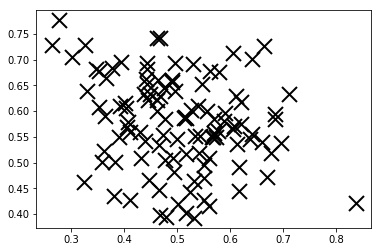

[(array([0.39081396, 0.56068037, 0.35840029, 0.40168461, 0.3373175 ,
         0.29419431, 0.42593281, 0.33381504, 0.70648646, 0.62164428,
         0.38775513, 0.52978111, 0.48183926, 0.42199404, 0.51649474,
         0.55362169, 0.62623776, 0.45833729, 0.58073224, 0.65780316,
         0.42389149, 0.16885806, 0.44142822, 0.46731505, 0.49579131,
         0.56096545, 0.61032961, 0.30637919, 0.58736295, 0.42183172,
         0.63850473, 0.42318261, 0.48118835, 0.38479205, 0.3906208 ,
         0.42644564, 0.61598551, 0.35291625, 0.38312303, 0.33766374,
         0.33930515, 0.34075914, 0.64492982, 0.54613221, 0.39942472,
         0.66862632, 0.6112535 , 0.2779533 , 0.4036932 , 0.44976692,
         0.49375111, 0.5031198 , 0.44709831, 0.67368147, 0.652695  ,
         0.67156376, 0.54347115, 0.64426648, 0.54424562, 0.42998494,
         0.40391734, 0.49575017, 0.73981972, 0.67194843, 0.61912937,
         0.50664559, 0.26474957, 0.38219992, 0.25746883, 0.55544591,
         0.68461274, 0.59037971, 0

In [25]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot

kmeans = KMeans(n_clusters=110, random_state=0).fit(X_scaled_new)

k = 110
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled_new)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = X_scaled_new[np.where(labels==i)]
    # plot the data observations
#     pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

result = zip(X_scaled_new , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR